/var/folders/y9/73d8vs756fl7t9s57p1zlxvh0000gp/T/ipykernel_42763/3665872507.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  np.cot = lambda x: 1 / np.tan(x)


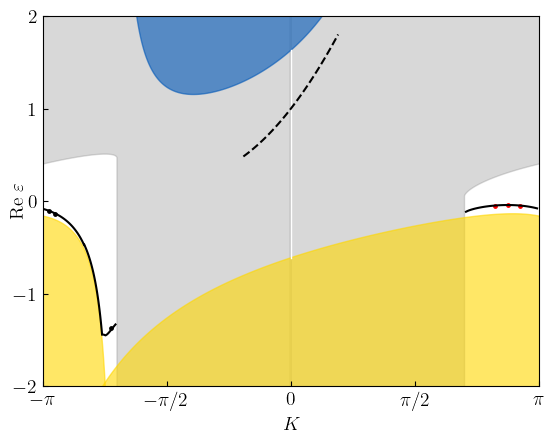

In [1]:
import numpy as np
import cmath
import math
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["CM"],
    "mathtext.fontset": "cm"  # 使用CM Math作为数学模式字体
})

ksi = 0.1
psi = math.pi*0.35

np.cot = lambda x: 1 / np.tan(x)

def Energy(k):
    energy = 2 / (2 * (1 + ksi)) * (np.cot((psi - k) / 2) + ksi * np.cot((psi + k) / 2))
    return energy

def Energy2(q):
    return (Energy(q)+Energy(K-q))/2

def Energy3(q):
    return -Energy2(q)

# def Energy4(q):
#     if Energy2(q) < 0:
#         return -Energy2(q)
#     else:
#         return 100

K1 = np.linspace(-2*psi,2*psi,1000)
Emin1 = []

for i in range(len(K1)):
    K = K1[i]
    lower_bound = max(-psi, K - psi)
    upper_bound = min(psi, K + psi)
    result = minimize_scalar(Energy2, bounds=(lower_bound,upper_bound), method='bounded')
    Emin1.append(result.fun)

K7 = np.linspace(2*psi,2*(2*math.pi-psi),1000)
Emax7 = []


for i in range(len(K7)-1):
    K = K7[i]
    # print(i)
    lower_bound = max(psi,K+psi-2*math.pi)
    upper_bound = min(2*math.pi-psi, K-psi)
    # lower_bound = psi
    # upper_bound = K-psi
    result = minimize_scalar(Energy3, bounds=(lower_bound,upper_bound), method='bounded')
    Emax7.append(-result.fun)
    # print(result.x)

k7 = K7[:999]-2*math.pi

K8 = np.linspace(0,2*math.pi,1000)
Emin8 = []
# Emax8 = []

for i in range(len(K8)):
    K = K8[i]
    lower_bound = max(-psi,K+psi-2*math.pi)
    upper_bound = min(psi, K-psi)
    result = minimize_scalar(Energy2, bounds=(lower_bound,upper_bound), method='bounded')
    Emin8.append(result.fun)
    
xbound1 = np.load('xbound1_0.1.npy')
xbound2 = np.load('xbound2_0.1.npy')
xbound3 = np.load('xbound3_0.1.npy')
ybound1 = np.load('ybound1_0.1.npy')
ybound2 = np.load('ybound2_0.1.npy')
ybound3 = np.load('ybound3_0.1.npy')


K9 = np.linspace(-2.617,-2.39, 100) + 4*math.pi
Emax9 = []

for i in range(len(K9)):
    K = K9[i]
    lower_bound = max(psi,K+psi-2*math.pi)
    upper_bound = min(2*math.pi-psi, K-psi)
    result = minimize_scalar(Energy3, bounds=(lower_bound,upper_bound), method='bounded')
    Emax9.append(-result.fun)

Emax9 =  np.array(Emax9)


xbound0 = np.linspace(-0.6,0.6, 50)
ybound0 = 1+ 1.1*xbound0 + 0.4*xbound0**2

# xbound0 = np.linspace(-0.38,0.45,100)
# ybound0 = []
# for i in range(len(xbound0)):
#     ybound0.append(curve(xbound0[i]))

plt.fill_between(K8,3,Emin8, color='grey', alpha=0.3)
plt.fill_between(K8-2*math.pi,3,Emin8, color='grey', alpha=0.3)

plt.fill_between(k7,Emax7,-3, color='#FFD700', alpha=0.6)
plt.fill_between(k7-2*math.pi,Emax7,-3, color='#FFD700', alpha=0.6)

plt.fill_between(K1,3,Emin1, color='#0057B7', alpha=0.6)


plt.plot([0,0], [-0.612801,1.63185], linestyle='-', color='white', linewidth=1)

plt.plot(xbound1,ybound1,c='black')
plt.plot(xbound2,ybound2,c='black')
plt.plot(xbound3,ybound3,c='black')
plt.plot(K9-4*math.pi,Emax9+0.05,c='black')
plt.plot(xbound0,ybound0,linestyle='--',c='black')

##########################
x1 = []
y1 = []

x2 = []
y2 = []

x2.append(4.005530633326986-2*math.pi)
y2.append(-1.3706110939449445)

x1.append(9.189158511750144-2*math.pi)
x1.append(8.874999246391166-2*math.pi)
y1.append(-0.04813906820709235)
y1.append(-0.04813906820709235)

x1.append(9.032078879070655-2*math.pi)
y1.append(-0.04311680209912083)

x2.append(9.503317777109125-4*math.pi)
y2.append(-0.1095783440600826)

x2.append(9.581857593448868-4*math.pi)
y2.append(-0.1378499134982576)

plt.scatter(x1,y1,s=6,c='red')
plt.scatter(x2,y2,s=6,c='black')

###########################

plt.ylim(-2,2)
plt.xlim(-math.pi,math.pi)
plt.xticks([-math.pi,-math.pi/2,0,math.pi/2,math.pi],[r'$-\pi$',r'$-\pi/2$',r'$0$',r'$\pi/2$',r'$\pi$'], fontsize=14)
plt.yticks([-2,-1,0,1,2],[r'$-2$',r'$-1$',r'$0$',r'$1$',r'$2$'],fontsize=14)
plt.tick_params(direction='in')

plt.xlabel(r'$K$', fontsize=14)
plt.ylabel(r'$\mathrm{Re}\ \varepsilon$', fontsize=14,labelpad=-10,y=0.5)

# plt.title(f'$ksi={ksi}, phi=0.35pi$')
# plt.savefig('figSM_xi=0.1.pdf', format='pdf')

plt.show()


In [30]:
print(Energy(0))
print(Energy(math.pi))

# plt.plot(K9-4*math.pi,Emax9,c='black')
# plt.show()

print(xbound1[-1])
print(xbound2[0])

1.6318516871287896
-0.6128007881399321
-2.617993877991494
-2.3666664657043106


/var/folders/y9/73d8vs756fl7t9s57p1zlxvh0000gp/T/ipykernel_42763/3665872507.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  np.cot = lambda x: 1 / np.tan(x)
/var/folders/y9/73d8vs756fl7t9s57p1zlxvh0000gp/T/ipykernel_42763/3665872507.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  np.cot = lambda x: 1 / np.tan(x)


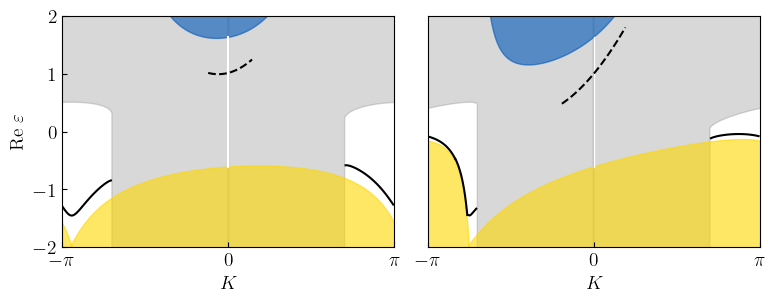

In [2]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))

ksi = 0.7
K1 = np.linspace(-2*psi,2*psi,1000)
Emin1 = []

for i in range(len(K1)):
    K = K1[i]
    lower_bound = max(-psi, K - psi)
    upper_bound = min(psi, K + psi)
    result = minimize_scalar(Energy2, bounds=(lower_bound,upper_bound), method='bounded')
    Emin1.append(result.fun)

K7 = np.linspace(2*psi,2*(2*math.pi-psi),1000)
Emax7 = []


for i in range(len(K7)-1):
    K = K7[i]
    # print(i)
    lower_bound = max(psi,K+psi-2*math.pi)
    upper_bound = min(2*math.pi-psi, K-psi)
    # lower_bound = psi
    # upper_bound = K-psi
    result = minimize_scalar(Energy3, bounds=(lower_bound,upper_bound), method='bounded')
    Emax7.append(-result.fun)
    # print(result.x)

k7 = K7[:999]-2*math.pi

K8 = np.linspace(0,2*math.pi,1000)
Emin8 = []

for i in range(len(K8)):
    K = K8[i]
    lower_bound = max(-psi,K+psi-2*math.pi)
    upper_bound = min(psi, K-psi)
    result = minimize_scalar(Energy2, bounds=(lower_bound,upper_bound), method='bounded')
    Emin8.append(result.fun)

x_chiral = np.load('x_chiral.npy')
y_chiral = np.load('y_chiral.npy')

xr = []
yr = []
xl = []
yl = []

for i in range(len(x_chiral)):
    if x_chiral[i] < math.pi:
        xr.append(x_chiral[i])
        yr.append(y_chiral[i])
    else:
        xl.append(x_chiral[i]-2*math.pi)
        yl.append(y_chiral[i])

xbound0 = np.linspace(-0.38,0.45,100)
ybound0 = 0.62*(xbound0+0.19)**2 + 0.995

ax1.fill_between(K8,3,Emin8, color='grey', alpha=0.3)
ax1.fill_between(K8-2*math.pi,3,Emin8, color='grey', alpha=0.3)

ax1.fill_between(k7,Emax7,-3, color='#FFD700', alpha=0.6)
ax1.fill_between(k7-2*math.pi,Emax7,-3, color='#FFD700', alpha=0.6)

ax1.fill_between(K1,3,Emin1, color='#0057B7', alpha=0.6)


ax1.plot([0,0], [-0.612801,1.63185], linestyle='-', color='white')

ax1.plot(xbound0,ybound0,linestyle='--',c='black')

ax1.plot(xr,yr,c='black')
ax1.plot(xl,yl, c= 'black')

ax1.set_ylim(-2,2)
ax1.set_xlim(-math.pi,math.pi)

ax1.set_xticks([-math.pi,0,math.pi],[r'$-\pi$',r'$0$',r'$\pi$'], fontsize=14)
ax1.set_yticks([-2,-1,0,1,2],[r'$-2$',r'$-1$',r'$0$',r'$1$',r'$2$'],fontsize=14)
ax1.tick_params(direction='in')

ax1.set_xlabel(r'$K$', fontsize=14)
ax1.set_ylabel(r'$\mathrm{Re}\ \varepsilon$', fontsize=14)


ksi = 0.1
K1 = np.linspace(-2*psi,2*psi,1000)
Emin1 = []

for i in range(len(K1)):
    K = K1[i]
    lower_bound = max(-psi, K - psi)
    upper_bound = min(psi, K + psi)
    result = minimize_scalar(Energy2, bounds=(lower_bound,upper_bound), method='bounded')
    Emin1.append(result.fun)

K7 = np.linspace(2*psi,2*(2*math.pi-psi),1000)
Emax7 = []


for i in range(len(K7)-1):
    K = K7[i]
    # print(i)
    lower_bound = max(psi,K+psi-2*math.pi)
    upper_bound = min(2*math.pi-psi, K-psi)
    # lower_bound = psi
    # upper_bound = K-psi
    result = minimize_scalar(Energy3, bounds=(lower_bound,upper_bound), method='bounded')
    Emax7.append(-result.fun)
    # print(result.x)

k7 = K7[:999]-2*math.pi

K8 = np.linspace(0,2*math.pi,1000)
Emin8 = []
# Emax8 = []

for i in range(len(K8)):
    K = K8[i]
    lower_bound = max(-psi,K+psi-2*math.pi)
    upper_bound = min(psi, K-psi)
    result = minimize_scalar(Energy2, bounds=(lower_bound,upper_bound), method='bounded')
    Emin8.append(result.fun)
    
xbound1 = np.load('xbound1_0.1.npy')
xbound2 = np.load('xbound2_0.1.npy')
xbound3 = np.load('xbound3_0.1.npy')
ybound1 = np.load('ybound1_0.1.npy')
ybound2 = np.load('ybound2_0.1.npy')
ybound3 = np.load('ybound3_0.1.npy')


K9 = np.linspace(-2.617,-2.39, 100) + 4*math.pi
Emax9 = []

for i in range(len(K9)):
    K = K9[i]
    lower_bound = max(psi,K+psi-2*math.pi)
    upper_bound = min(2*math.pi-psi, K-psi)
    result = minimize_scalar(Energy3, bounds=(lower_bound,upper_bound), method='bounded')
    Emax9.append(-result.fun)

Emax9 =  np.array(Emax9)


xbound0 = np.linspace(-0.6,0.6, 50)
ybound0 = 1+ 1.1*xbound0 + 0.4*xbound0**2

ax2.fill_between(K8,3,Emin8, color='grey', alpha=0.3)
ax2.fill_between(K8-2*math.pi,3,Emin8, color='grey', alpha=0.3)

ax2.fill_between(k7,Emax7,-3, color='#FFD700', alpha=0.6)
ax2.fill_between(k7-2*math.pi,Emax7,-3, color='#FFD700', alpha=0.6)

ax2.fill_between(K1,3,Emin1, color='#0057B7', alpha=0.6)


ax2.plot([0,0], [-0.612801,1.63185], linestyle='-', color='white', linewidth=1)

ax2.plot(xbound1,ybound1,c='black')
ax2.plot(xbound2,ybound2,c='black')
ax2.plot(xbound3,ybound3,c='black')
ax2.plot(K9-4*math.pi,Emax9+0.05,c='black')
ax2.plot(xbound0,ybound0,linestyle='--',c='black')

ax2.set_ylim(-2,2)
ax2.set_xlim(-math.pi,math.pi)

ax2.set_xticks([-math.pi,0,math.pi],[r'$-\pi$',r'$0$',r'$\pi$'], fontsize=14)
ax2.set_yticks([])
ax2.tick_params(direction='in')

ax2.set_xlabel(r'$K$', fontsize=14)


plt.subplots_adjust(wspace=0.1)
# plt.savefig('figS1.pdf',format='pdf', bbox_inches='tight')
plt.show()


/var/folders/y9/73d8vs756fl7t9s57p1zlxvh0000gp/T/ipykernel_4826/3125090907.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  np.cot = lambda x: 1 / np.tan(x)
/var/folders/y9/73d8vs756fl7t9s57p1zlxvh0000gp/T/ipykernel_4826/3125090907.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  np.cot = lambda x: 1 / np.tan(x)
/var/folders/y9/73d8vs756fl7t9s57p1zlxvh0000gp/T/ipykernel_4826/3125090907.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  np.cot = lambda x: 1 / np.tan(x)


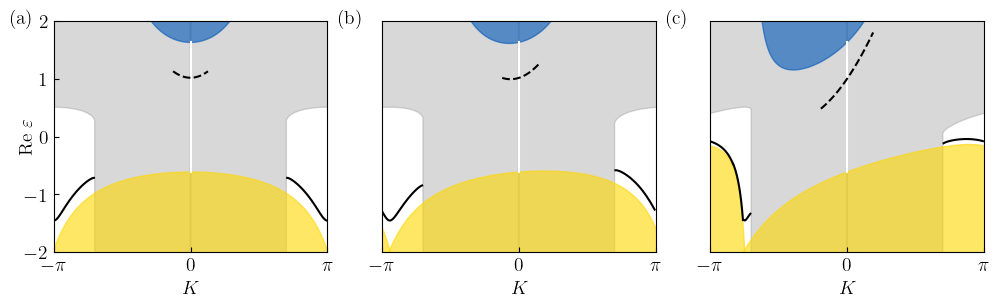

In [82]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 3))

ksi = 1

K1 = np.linspace(-2*psi,2*psi,1000)
Emin1 = []

for i in range(len(K1)):
    K = K1[i]
    lower_bound = max(-psi, K - psi)
    upper_bound = min(psi, K + psi)
    result = minimize_scalar(Energy2, bounds=(lower_bound,upper_bound), method='bounded')
    Emin1.append(result.fun)

K7 = np.linspace(2*psi,2*(2*math.pi-psi),1000)
Emax7 = []


for i in range(len(K7)-1):
    K = K7[i]
    # print(i)
    lower_bound = max(psi,K+psi-2*math.pi)
    upper_bound = min(2*math.pi-psi, K-psi)
    # lower_bound = psi
    # upper_bound = K-psi
    result = minimize_scalar(Energy3, bounds=(lower_bound,upper_bound), method='bounded')
    Emax7.append(-result.fun)
    # print(result.x)

k7 = K7[:999]-2*math.pi

K8 = np.linspace(0,2*math.pi,1000)
Emin8 = []

for i in range(len(K8)):
    K = K8[i]
    lower_bound = max(-psi,K+psi-2*math.pi)
    upper_bound = min(psi, K-psi)
    result = minimize_scalar(Energy2, bounds=(lower_bound,upper_bound), method='bounded')
    Emin8.append(result.fun)

x_non = np.load('x_non.npy')
y_non = np.load('y_non.npy')

xr = []
yr = []
xl = []
yl = []

for i in range(len(x_chiral)):
    if x_chiral[i] < math.pi:
        xr.append(x_non[i])
        yr.append(y_non[i])
    else:
        xl.append(x_non[i]-2*math.pi)
        yl.append(y_non[i])


xbound0 = np.linspace(-0.4,0.4,50)
ybound0 = 1.02 +   0.7*xbound0**2

ax0.fill_between(K8,3,Emin8, color='grey', alpha=0.3)
ax0.fill_between(K8-2*math.pi,3,Emin8, color='grey', alpha=0.3)

ax0.fill_between(k7,Emax7,-3, color='#FFD700', alpha=0.6)
ax0.fill_between(k7-2*math.pi,Emax7,-3, color='#FFD700', alpha=0.6)

ax0.fill_between(K1,3,Emin1, color='#0057B7', alpha=0.6)


ax0.plot([0,0], [-0.612801,1.63185], linestyle='-', color='white')

ax0.plot(xbound0,ybound0,linestyle='--',c='black')

ax0.plot(xr,yr,c='black')
ax0.plot(xl,yl, c= 'black')

ax0.set_ylim(-2,2)
ax0.set_xlim(-math.pi,math.pi)

ax0.set_xticks([-math.pi,0,math.pi],[r'$-\pi$',r'$0$',r'$\pi$'], fontsize=14)
ax0.set_yticks([-2,-1,0,1,2],[r'$-2$',r'$-1$',r'$0$',r'$1$',r'$2$'],fontsize=14)
ax0.tick_params(direction='in')

ax0.set_xlabel(r'$K$', fontsize=14)
ax0.set_ylabel(r'$\mathrm{Re}\ \varepsilon$', fontsize=14, labelpad = -8)


ksi = 0.7
K1 = np.linspace(-2*psi,2*psi,1000)
Emin1 = []

for i in range(len(K1)):
    K = K1[i]
    lower_bound = max(-psi, K - psi)
    upper_bound = min(psi, K + psi)
    result = minimize_scalar(Energy2, bounds=(lower_bound,upper_bound), method='bounded')
    Emin1.append(result.fun)

K7 = np.linspace(2*psi,2*(2*math.pi-psi),1000)
Emax7 = []


for i in range(len(K7)-1):
    K = K7[i]
    # print(i)
    lower_bound = max(psi,K+psi-2*math.pi)
    upper_bound = min(2*math.pi-psi, K-psi)
    # lower_bound = psi
    # upper_bound = K-psi
    result = minimize_scalar(Energy3, bounds=(lower_bound,upper_bound), method='bounded')
    Emax7.append(-result.fun)
    # print(result.x)

k7 = K7[:999]-2*math.pi

K8 = np.linspace(0,2*math.pi,1000)
Emin8 = []

for i in range(len(K8)):
    K = K8[i]
    lower_bound = max(-psi,K+psi-2*math.pi)
    upper_bound = min(psi, K-psi)
    result = minimize_scalar(Energy2, bounds=(lower_bound,upper_bound), method='bounded')
    Emin8.append(result.fun)

x_chiral = np.load('x_chiral.npy')
y_chiral = np.load('y_chiral.npy')

xr = []
yr = []
xl = []
yl = []

for i in range(len(x_chiral)):
    if x_chiral[i] < math.pi:
        xr.append(x_chiral[i])
        yr.append(y_chiral[i])
    else:
        xl.append(x_chiral[i]-2*math.pi)
        yl.append(y_chiral[i])

xbound0 = np.linspace(-0.38,0.45,100)
ybound0 = 0.62*(xbound0+0.19)**2 + 0.995

ax1.fill_between(K8,3,Emin8, color='grey', alpha=0.3)
ax1.fill_between(K8-2*math.pi,3,Emin8, color='grey', alpha=0.3)

ax1.fill_between(k7,Emax7,-3, color='#FFD700', alpha=0.6)
ax1.fill_between(k7-2*math.pi,Emax7,-3, color='#FFD700', alpha=0.6)

ax1.fill_between(K1,3,Emin1, color='#0057B7', alpha=0.6)


ax1.plot([0,0], [-0.612801,1.63185], linestyle='-', color='white')

ax1.plot(xbound0,ybound0,linestyle='--',c='black')

ax1.plot(xr,yr,c='black')
ax1.plot(xl,yl, c= 'black')

ax1.set_ylim(-2,2)
ax1.set_xlim(-math.pi,math.pi)

ax1.set_xticks([-math.pi,0,math.pi],[r'$-\pi$',r'$0$',r'$\pi$'], fontsize=14)
ax1.set_yticks([])
ax1.tick_params(direction='in')

ax1.set_xlabel(r'$K$', fontsize=14)
# ax1.set_ylabel(r'$\mathrm{Re}\ \varepsilon$', fontsize=14)


ksi = 0.1
K1 = np.linspace(-2*psi,2*psi,1000)
Emin1 = []

for i in range(len(K1)):
    K = K1[i]
    lower_bound = max(-psi, K - psi)
    upper_bound = min(psi, K + psi)
    result = minimize_scalar(Energy2, bounds=(lower_bound,upper_bound), method='bounded')
    Emin1.append(result.fun)

K7 = np.linspace(2*psi,2*(2*math.pi-psi),1000)
Emax7 = []


for i in range(len(K7)-1):
    K = K7[i]
    # print(i)
    lower_bound = max(psi,K+psi-2*math.pi)
    upper_bound = min(2*math.pi-psi, K-psi)
    # lower_bound = psi
    # upper_bound = K-psi
    result = minimize_scalar(Energy3, bounds=(lower_bound,upper_bound), method='bounded')
    Emax7.append(-result.fun)
    # print(result.x)

k7 = K7[:999]-2*math.pi

K8 = np.linspace(0,2*math.pi,1000)
Emin8 = []
# Emax8 = []

for i in range(len(K8)):
    K = K8[i]
    lower_bound = max(-psi,K+psi-2*math.pi)
    upper_bound = min(psi, K-psi)
    result = minimize_scalar(Energy2, bounds=(lower_bound,upper_bound), method='bounded')
    Emin8.append(result.fun)
    
xbound1 = np.load('xbound1_0.1.npy')
xbound2 = np.load('xbound2_0.1.npy')
xbound3 = np.load('xbound3_0.1.npy')
ybound1 = np.load('ybound1_0.1.npy')
ybound2 = np.load('ybound2_0.1.npy')
ybound3 = np.load('ybound3_0.1.npy')


K9 = np.linspace(-2.617,-2.39, 100) + 4*math.pi
Emax9 = []

for i in range(len(K9)):
    K = K9[i]
    lower_bound = max(psi,K+psi-2*math.pi)
    upper_bound = min(2*math.pi-psi, K-psi)
    result = minimize_scalar(Energy3, bounds=(lower_bound,upper_bound), method='bounded')
    Emax9.append(-result.fun)

Emax9 =  np.array(Emax9)


xbound0 = np.linspace(-0.6,0.6, 50)
ybound0 = 1+ 1.1*xbound0 + 0.4*xbound0**2

ax2.fill_between(K8,3,Emin8, color='grey', alpha=0.3)
ax2.fill_between(K8-2*math.pi,3,Emin8, color='grey', alpha=0.3)

ax2.fill_between(k7,Emax7,-3, color='#FFD700', alpha=0.6)
ax2.fill_between(k7-2*math.pi,Emax7,-3, color='#FFD700', alpha=0.6)

ax2.fill_between(K1,3,Emin1, color='#0057B7', alpha=0.6)


ax2.plot([0,0], [-0.612801,1.63185], linestyle='-', color='white')

ax2.plot(xbound1,ybound1,c='black')
ax2.plot(xbound2,ybound2,c='black')
ax2.plot(xbound3,ybound3,c='black')
ax2.plot(K9-4*math.pi,Emax9+0.05,c='black')
ax2.plot(xbound0,ybound0,linestyle='--',c='black')

ax2.set_ylim(-2,2)
ax2.set_xlim(-math.pi,math.pi)

ax2.set_xticks([-math.pi,0,math.pi],[r'$-\pi$',r'$0$',r'$\pi$'], fontsize=14)
ax2.set_yticks([])
ax2.tick_params(direction='in')

ax2.set_xlabel(r'$K$', fontsize=14)

ax0.text(-0.16, 1.05, '(a)', transform=ax0.transAxes, fontsize=14, va='top')
ax1.text(-0.16, 1.05, '(b)', transform=ax1.transAxes, fontsize=14, va='top')
ax2.text(-0.16, 1.05, '(c)', transform=ax2.transAxes, fontsize=14, va='top')


plt.subplots_adjust(wspace=0.2)
plt.savefig('figS1.pdf',format='pdf', bbox_inches='tight')
# plt.savefig('figS2_retreat.pdf',format='pdf', bbox_inches='tight')

plt.show()
